## Plotting Benchmarking Result for PrivacyGLUE

PrivacyGLUE is a Natural Language Understanding benchmark which determines the performance of models in the privacy domain by fine-tuning, testing and measring their performance on tasks related to analysis of privacy documents.
In this notebook we visualize the benchmark performance of 5 selected transformer-based models. 

In [1]:
from plotnine import *
from plotnine.data import *

%matplotlib inline

In [2]:
import json
import pandas as pd

First we get the f1 score results from the runs directory and arange them in a pandas dataframe.

In [3]:
MODELS = {
    "mukund_privbert": "PrivBERT",
    "bert_base_uncased": "BERT",
    "roberta_base":"RoBERTa",
    "nlpaueb_legal_bert_base_uncased": "LegalBERT",
}
TASKS= {
    "opp_115",
    "piextract",
    "policy_detection",
    "policy_ie_a",
    "policy_ie_b",
    "policy_qa",
    "privacy_qa"
}
all_results = []
for model in MODELS:
    with open(f"../runs/{model}/benchmark_summary.json", "r") as summary_file:
        model_results = json.load(summary_file)
        for task, task_dict in model_results.items():
            if task == "policy_qa":
                continue
            row_dict = {}
            row_dict["model_name"]= MODELS[model]
            row_dict["task"] = task
            row_dict["macro_f1_mean"] = task_dict["mean"][0]
            row_dict["micro_f1_mean"] = task_dict["mean"][1]
            row_dict["macro_f1_std"] = task_dict["std"][1]
            row_dict["micro_f1_std"] = task_dict["std"][1]
            row_dict["num_samples"] = task_dict["num_samples"]
            all_results.append(row_dict)

In [4]:
all_results = pd.DataFrame(all_results)
all_results

,model_name,task,macro_f1_mean,micro_f1_mean,macro_f1_std,micro_f1_std,num_samples
0,PrivBERT,privacy_qa,0.553336,0.902381,0.000772,0.000772,8
1,PrivBERT,opp_115,0.820979,0.872396,0.003824,0.003824,10
2,PrivBERT,piextract,0.664122,0.664122,0.034249,0.034249,10
3,PrivBERT,policy_ie_a,0.752586,0.862344,0.009587,0.009587,10
4,PrivBERT,policy_ie_b,0.553711,0.557272,0.013451,0.013451,10
5,PrivBERT,policy_detection,0.873482,0.928900,0.008152,0.008152,10
6,BERT,privacy_qa,0.535341,0.899803,0.000862,0.000862,8
7,BERT,opp_115,0.784412,0.839936,0.004648,0.004648,10
8,BERT,piextract,0.600265,0.600265,0.026643,0.026643,10
9,BERT,policy_ie_a,0.729090,0.846974,0.009568,0.009568,10


Then visualize the micro and macro f1 scores.

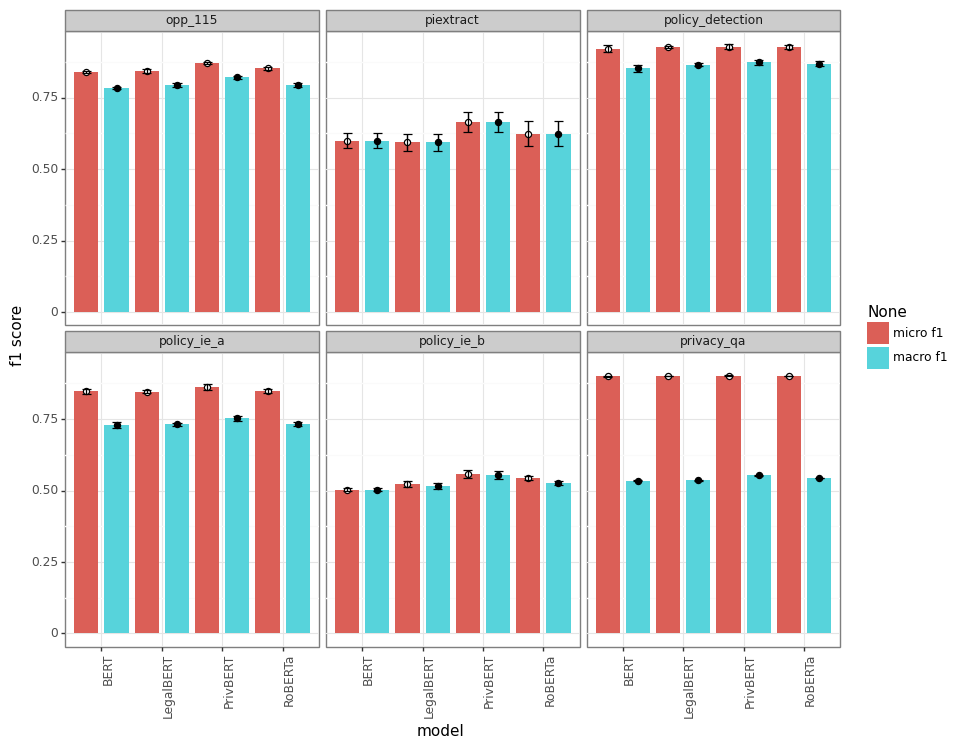

<ggplot: (671819002)>

In [5]:
aes_macro = aes(x='model_name', y='macro_f1_mean', fill=["macro f1"]*24)
aes_micro = aes(x='model_name', y='micro_f1_mean', fill=["micro f1"]*24)
aes_point_macro = aes(x='model_name', y='macro_f1_mean', ymin='macro_f1_mean - macro_f1_std', ymax='macro_f1_mean + macro_f1_std')
aes_point_micro = aes(x='model_name', y='micro_f1_mean', ymin='micro_f1_mean - micro_f1_std', ymax='micro_f1_mean + micro_f1_std')
(
    ggplot(all_results)
    + geom_col(mapping=aes_micro, width=0.4, position=position_nudge(-0.25))
    + geom_col(mapping=aes_macro, width=0.4, position=position_nudge(0.25))
    + geom_pointrange(mapping=aes_point_micro, fill="white", position=position_nudge(-0.25))
    + geom_pointrange(mapping=aes_point_macro, fill="black", position=position_nudge(0.25))
    + geom_errorbar(mapping=aes_point_micro, width=0.15, position=position_nudge(-0.25))
    + geom_errorbar(mapping=aes_point_macro, width=0.15, position=position_nudge(0.25))
    + facet_wrap('task')
    + theme_bw()
    + theme(axis_text_x = element_text(angle = 90,              # change facet text angle
                                        ha = 'left'             # change text alignment
                                       ),
            figure_size=(10, 8)                                 # adjust width & height of figure to fit y-axis
    )
    + labs(x='model', y="f1 score")
)

## Inspect Prediction Results

In [6]:
predictions = {}
for model in MODELS:
    predictions[model] = {}
    for task in TASKS:
        predictions[model][task] = []
        for i in range(10):
            with open(f"../runs/{model}/{task}/seed_{i}/predictions.json", "r") as pred_file:
                preds = json.load(pred_file)
                predictions[model][task].append(preds)

In [14]:
from itertools import permutations 

for model1, model2 in permutations(MODELS.keys(), 2):
    for task in TASKS:
        for i in range(10):
            for result1, result2 in zip(predictions[model1][task][i], predictions[model2][task][i]):
                if result1["predicted_label"] != result2["predicted_label"] and result1["predicted_label"] != result1["gold_label"]:
                    print(result1)
                    break
                
        break
    break

{'id': 12, 'text': 'Thank you for visiting us, we truly appreciate it! We owe all our thanks to you the visitors. We are a fan website for the PS4. We do it because we love the PS4 and all it will offer. \n\n  \nWe as a fan site are NOT affiliated with SCEI (Sony Computer Entertainment Inc.) nor endorsed by SCEI.  \n\n\nWe use third-party advertising companies, such as Google, to serve ads when you visit our website. These companies may use information (not including your name, address, email address, or telephone number) about your visits to this and other websites in order to provide advertisements about goods and services of interest to you. If you would like more information about this practice and to know your choices about not having this information used by these companies, view the policy.\n', 'gold_label': 'Policy', 'predicted_label': 'Not Policy'}
{'id': 12, 'text': 'Thank you for visiting us, we truly appreciate it! We owe all our thanks to you the visitors. We are a fan web